# Project: MNIST classification

In [89]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import cv2
import matplotlib.pyplot as plt
from mnist import MNIST
import time

## Load dataset and features extraction

Sample image:


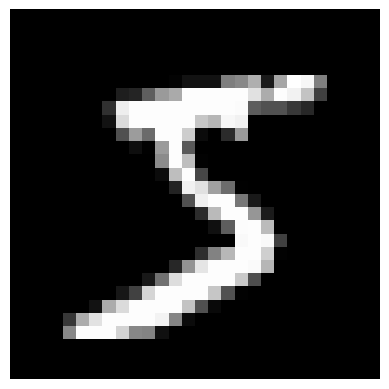

Normalize..
Finished extracting features in 9.05 seconds..
Train size: 60000
Test size: 10000


In [95]:
def feature_Extractor_MNIST(folder_path, show_sample=True, reduce=False, reduce_percent=0.5):
    start = time.time()

    MNIST_dataset = MNIST(folder_path)
    X_train, y_train = MNIST_dataset.load_training()
    X_test, y_test = MNIST_dataset.load_testing()

    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

    if show_sample == True:
        print('Sample image:')
        img = X_train[0,:].reshape((28,28))
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        plt.show()

    # Reduce dimensionality
    if reduce == True:
        print('Reduce dimensionality..')
        projection_matrix = np.random.randn(X_train.shape[1], int(X_train.shape[1]*(1 - reduce_percent)))
        X_train = np.dot(X_train, projection_matrix)
        X_test = np.dot(X_test, projection_matrix)
    
    # Normalization
    print('Normalize..')
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'Finished extracting features in {(time.time() - start):.2f} seconds..')
    print('Train size:', X_train.shape[0])
    print('Test size:', X_test.shape[0])


    return X_train, X_test, y_train, y_test

# Download data from here: http://yann.lecun.com/exdb/mnist/
X_train, X_test, y_train, y_test = feature_Extractor_MNIST('./MNIST')

## Train model and evaluate

#### Train model

In [96]:
start = time.time()
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000).fit(X_train, y_train)
print(f'Finished training model in {(time.time() - start):.2f} seconds..')

Finished training model in 254.87 seconds..


#### Evaluate

In [97]:
y_pred = model.predict(X_test)
print(f'Accuracy score for 10k testing dataset: {(accuracy_score(y_test, y_pred)*100):.2f} %')

Accuracy score for 10k testing dataset: 92.56 %


## Inference model

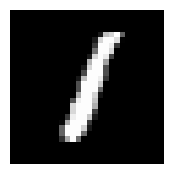

Prediction: 1


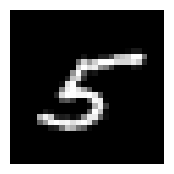

Prediction: 5


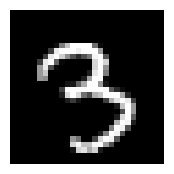

Prediction: 3


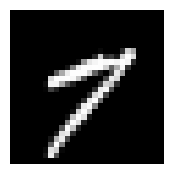

Prediction: 7


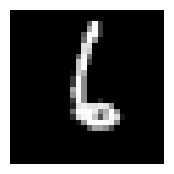

Prediction: 6


In [112]:
num_test = 5
inference_ids = np.random.randint(0, X_test.shape[0] - 1, num_test)
for id in inference_ids:
    # Show sample image
    img = np.array(X_train[id,:]*255, dtype='int').reshape((28,28))
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()

    # Show prediction result
    y_pred = model.predict(X_train[id:id+1,:])
    print('Prediction:', y_pred[0])